In [ ]:
# Step 1: Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 2: Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Step 3: Read the dataset
df = pd.read_csv('/content/drive/MyDrive/data_ndv/spam_ham_dataset.csv')
df.head()


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [ ]:
# Step 4: Data Preprocessing
# Basic info
df.info()

# Check for missing values
print(df.isnull().sum())

# We'll focus on 'label' and 'text' columns
df = df[['label', 'text']]

# Encode labels (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Check balance of classes
df['label'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB
Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


,count
label,
0,3672
1,1499


In [ ]:
# Step 5: Vectorize the text data using TF-IDF
# Initialize vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the text data
X = tfidf.fit_transform(df['text'])
y = df['label']


In [ ]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Step 7:  Train Models
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
# Step 8 : Evaluate the models
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


--- Logistic Regression ---
Accuracy: 0.9893719806763285
Precision: 0.9676375404530745
Recall: 0.9966666666666667
F1 Score: 0.9819376026272578

Confusion Matrix:
 [[725  10]
 [  1 299]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       735
           1       0.97      1.00      0.98       300

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035

--- Random Forest ---
Accuracy: 0.9806763285024155
Precision: 0.945859872611465
Recall: 0.99
F1 Score: 0.9674267100977199

Confusion Matrix:
 [[718  17]
 [  3 297]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       735
           1       0.95      0.99      0.97       300

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.98      1035


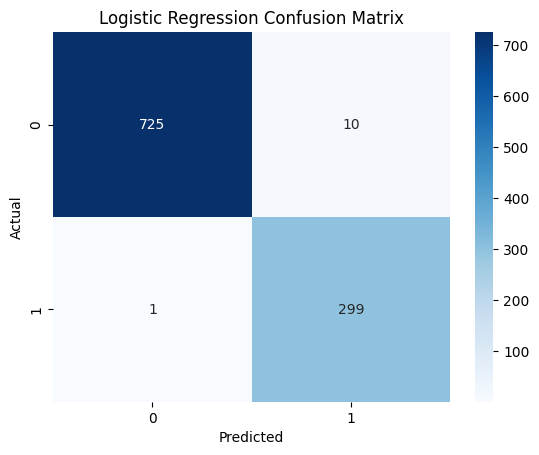

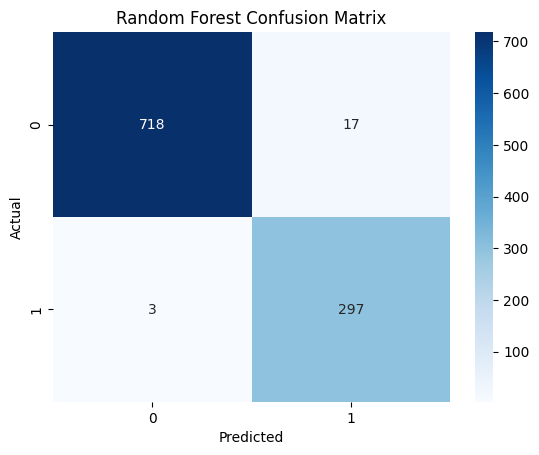

In [ ]:
# Step 9: Confusion matrix visualization
def plot_confusion(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")
plot_confusion(y_test, y_pred_rf, "Random Forest Confusion Matrix")


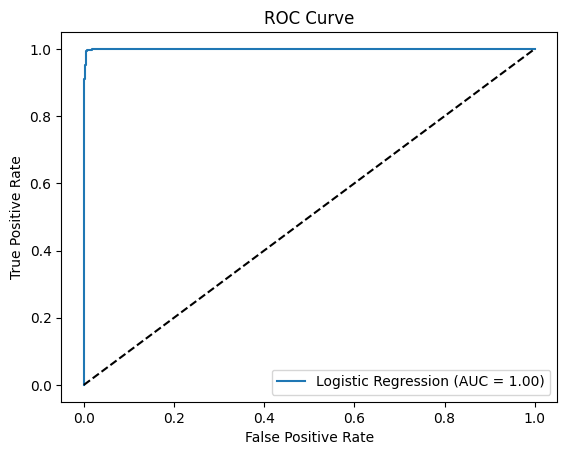

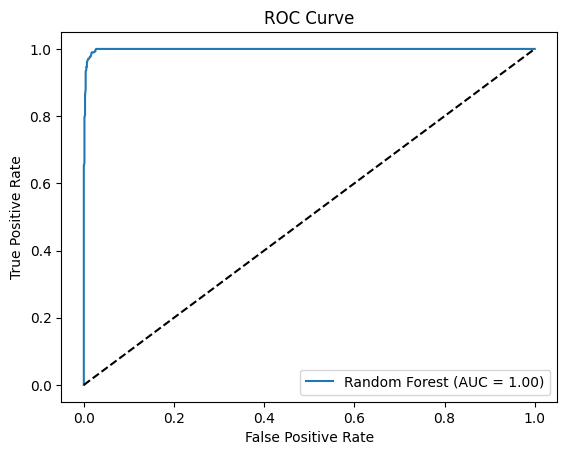

In [ ]:
# Step 10: ROC Curve
def plot_roc(y_test, y_proba, title):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{title} (AUC = {roc_auc:.2f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Predict proba
plot_roc(y_test, lr.predict_proba(X_test)[:,1], 'Logistic Regression')
plot_roc(y_test, rf.predict_proba(X_test)[:,1], 'Random Forest')


In [ ]:
# Step 11 :  Hyperparameter Tuning
param_grid = {
    'max_depth': [None, 10, 20],
    'n_estimators': [50, 100, 200]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
best_rf = grid.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

evaluate_model(y_test, y_pred_best_rf, "Tuned Random Forest")


Best parameters: {'max_depth': None, 'n_estimators': 100}
--- Tuned Random Forest ---
Accuracy: 0.9806763285024155
Precision: 0.945859872611465
Recall: 0.99
F1 Score: 0.9674267100977199

Confusion Matrix:
 [[718  17]
 [  3 297]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       735
           1       0.95      0.99      0.97       300

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



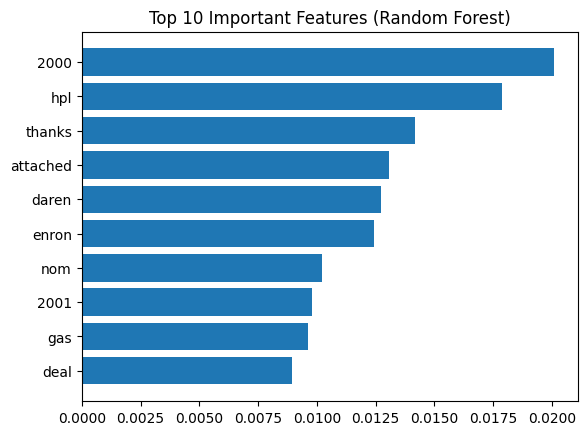

In [ ]:
# Step 12:  Feature Importance
# Get feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10

# Map back to feature names
features = np.array(tfidf.get_feature_names_out())[indices]

# Plot
plt.barh(features, importances[indices])
plt.title("Top 10 Important Features (Random Forest)")
plt.show()
